# PHP - Pulsating Heat Pipe [DI-Water, 60FR]
Data collection and preparation for data analysis and machine learning 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno
sns.set()
import glob
from ipynb.fs.full.mdf import DataChop, DataArrange, DataETL, DataPropAvg, GibbsFE

### Menualy Defined Functions (MDF)
[more details: help(function_name)]
1. DataETL
2. DataChop
3. DataArrange
4. DataPropAvg
5. GibbsFE

## Data loading

In [2]:
# loading and cleaning data
df = DataETL('data/di_water_exp/60_FR/')

In [3]:
# adding calculated GFE in the main dataframe
df= GibbsFE(df)
df

,Time (Min),Tc - AVG (oC),Te - AVG (oC),Pressure (mm of Hg),Te - Tc (oC),Q (W),Resistance (oC/W),GFE [KJ/mol],GFE_Tc [KJ/mol],dG [KJ/mol]
0,0.0,23.50,25.000000,310.00,1.500000,80,0.018750,-2190.243835,-2179.224665,-11.019171
1,0.5,23.50,24.666667,310.00,1.166667,80,0.014583,-2187.795131,-2179.224665,-8.570466
2,1.0,23.25,25.000000,310.00,1.750000,80,0.021875,-2190.243835,-2177.388136,-12.855699
3,1.5,23.25,27.000000,310.00,3.750000,80,0.046875,-2204.936063,-2177.388136,-27.547927
4,2.0,23.25,29.000000,310.00,5.750000,80,0.071875,-2219.628291,-2177.388136,-42.240154
...,...,...,...,...,...,...,...,...,...,...
460,58.0,68.75,93.000000,1017.46,24.250000,80,0.303125,928.194358,866.720336,61.474022
461,58.5,68.75,93.200000,1017.46,24.450000,80,0.305625,928.701361,866.720336,61.981024
462,59.0,69.50,93.400000,1017.46,23.900000,80,0.298750,929.208363,868.621595,60.586768
463,59.5,69.50,93.600000,1017.46,24.100000,80,0.301250,929.715365,868.621595,61.093770


## EDA

In [4]:
df.describe()

,Time (Min),Tc - AVG (oC),Te - AVG (oC),Pressure (mm of Hg),Te - Tc (oC),Resistance (oC/W),GFE [KJ/mol],GFE_Tc [KJ/mol],dG [KJ/mol]
count,464.000000,464.000000,464.000000,464.000000,464.000000,465.000000,464.000000,464.000000,464.000000
mean,28.911638,56.207435,77.077011,642.557112,20.869576,0.260874,-574.687080,-548.752397,-25.934683
std,17.021957,13.979918,17.848938,205.860710,6.390729,0.079798,981.563952,940.554538,49.512709
min,0.000000,23.250000,24.666667,285.000000,0.000000,0.000000,-2593.364049,-2497.224138,-142.401163
25%,14.375000,46.187500,70.600000,460.000000,19.475000,0.243750,-1379.647040,-1273.449989,-60.638514
50%,28.750000,60.500000,84.400000,685.000000,22.800000,0.284375,-268.800904,-249.532585,-11.340619
75%,43.125000,67.750000,89.800000,760.000000,24.650000,0.308125,39.894002,37.360615,2.611358
max,60.000000,79.250000,95.666667,1017.460000,33.333333,0.416667,930.729370,868.621595,62.107775


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time (Min)           464 non-null    float64
 1   Tc - AVG (oC)        464 non-null    float64
 2   Te - AVG (oC)        464 non-null    float64
 3   Pressure (mm of Hg)  464 non-null    float64
 4   Te - Tc (oC)         464 non-null    float64
 5   Q (W)                465 non-null    object 
 6   Resistance (oC/W)    465 non-null    float64
 7   GFE [KJ/mol]         464 non-null    float64
 8   GFE_Tc [KJ/mol]      464 non-null    float64
 9   dG [KJ/mol]          464 non-null    float64
dtypes: float64(9), object(1)
memory usage: 36.5+ KB


<Axes: title={'center': 'Tc & Te'}, xlabel='Data', ylabel='Temperature[C]'>

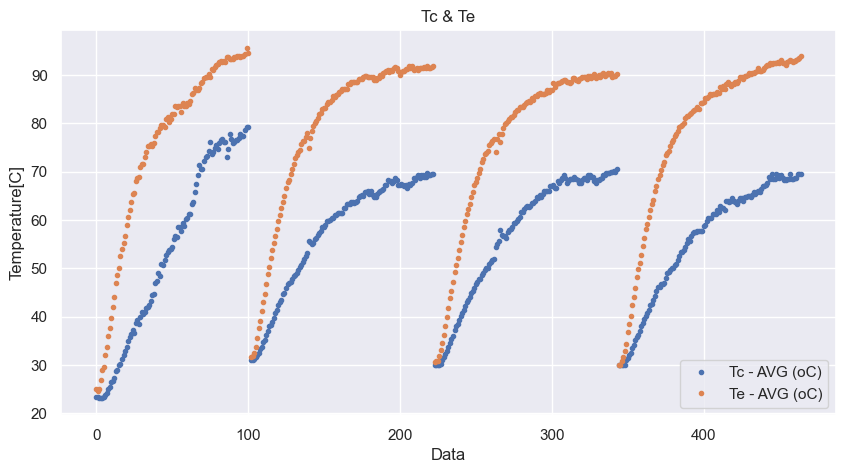

In [6]:
df[['Tc - AVG (oC)', 'Te - AVG (oC)']].plot(style='.',
                                                      figsize=(10,5),
                                                      title = 'Tc & Te',
                                                      xlabel='Data',
                                                      ylabel='Temperature[C]')

<Axes: title={'center': 'Thermal Performance'}, xlabel='Data', ylabel='Thermal Resistance [C/W]'>

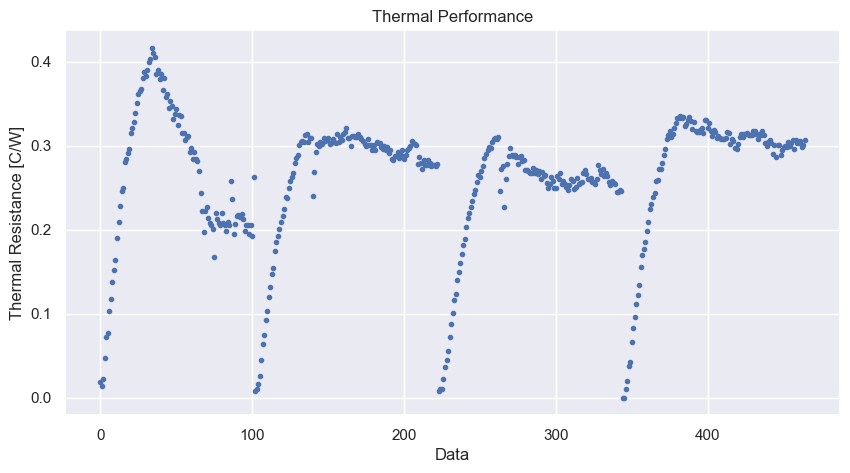

In [7]:
df['Resistance (oC/W)'].plot(style='.',
                             figsize=(10,5),
                             title =  'Thermal Performance',
                             xlabel='Data',
                             ylabel='Thermal Resistance [C/W]')

<Axes: title={'center': 'Pressure'}, xlabel='Data', ylabel='Pressure [mmHg]'>

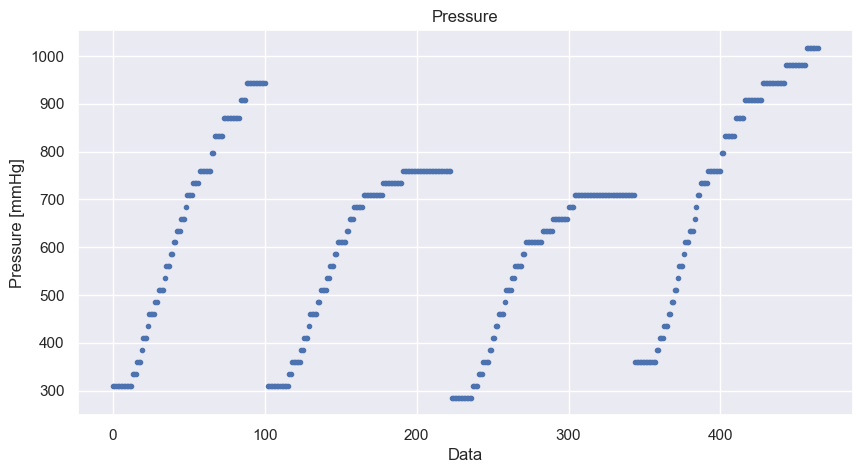

In [8]:
df['Pressure (mm of Hg)'].plot(style='.',
                                 figsize=(10,5),
                                 title='Pressure',
                                 xlabel='Data',
                                 ylabel='Pressure [mmHg]')

<Axes: title={'center': 'Temperature Difference'}, xlabel='Data', ylabel='Temperature Difference[C]'>

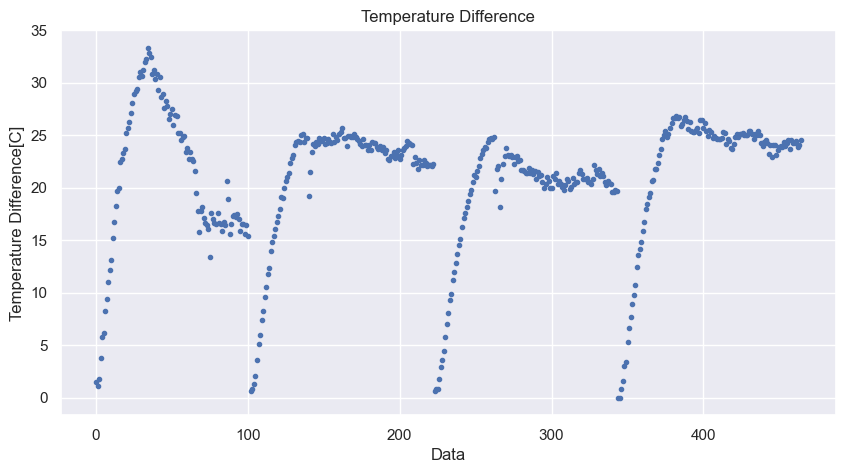

In [9]:
df['Te - Tc (oC)'].plot(style='.',
                        figsize=(10,5),
                        title=('Temperature Difference'),
                        xlabel='Data',
                        ylabel='Temperature Difference[C]')

<Axes: title={'center': 'Gibbs Free Energy'}, xlabel='Data', ylabel='Change in Gibbs Free Energy [KJ/mol]'>

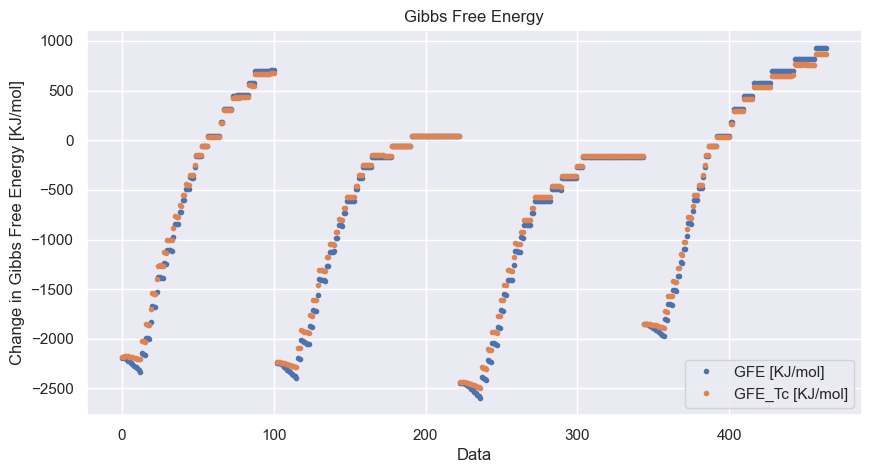

In [10]:
df[['GFE [KJ/mol]', 'GFE_Tc [KJ/mol]']].plot(style='.',
                        figsize=(10,5),
                        title = 'Gibbs Free Energy',
                        xlabel = 'Data',
                        ylabel = 'Change in Gibbs Free Energy [KJ/mol]')

## Data Grouping and Arranging

In [11]:
df_mean, df_std = DataArrange(df,'data/di_water_exp/60_FR/')

/Users/nirmal/Documents/data_science/PulseHeatPipe/mdf.ipynb:59: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  },


In [12]:
df_mean

,Te - AVG (oC),Time (Min),Tc - AVG (oC),Pressure (mm of Hg),Te - Tc (oC),Resistance (oC/W),GFE [KJ/mol],GFE_Tc [KJ/mol],dG [KJ/mol]
0,24.666667,0.5,23.500,310.000,1.166667,0.014583,-2187.795131,-2179.224665,-8.570466
1,25.000000,0.5,23.375,310.000,1.625000,0.020312,-2190.243835,-2178.306401,-11.937435
2,27.000000,1.5,23.250,310.000,3.750000,0.046875,-2204.936063,-2177.388136,-27.547927
3,29.000000,2.0,23.250,310.000,5.750000,0.071875,-2219.628291,-2177.388136,-42.240154
4,29.666667,2.5,23.500,310.000,6.166667,0.077083,-2224.525700,-2179.224665,-45.301035
...,...,...,...,...,...,...,...,...,...
225,93.666667,45.1,75.650,929.188,18.016667,0.225208,652.535560,620.720063,31.815498
226,94.000000,50.0,75.600,958.612,18.400000,0.230000,747.471898,709.250597,38.221301
227,94.333333,49.0,78.750,943.900,15.583333,0.194792,702.294560,672.513372,29.781188
228,94.666667,50.0,79.250,943.900,15.416667,0.192708,702.931591,673.468918,29.462673


In [13]:
df_std

,Te - AVG (oC),Time (Min),Tc - AVG (oC),Pressure (mm of Hg),Te - Tc (oC),Resistance (oC/W),GFE [KJ/mol],GFE_Tc [KJ/mol],dG [KJ/mol]
1,25.000000,0.707107,0.176777,0.000000,0.176777,0.002210,0.000000,1.298622,1.298622
5,30.000000,0.353553,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,30.800000,0.288675,0.000000,43.301270,0.000000,0.000000,340.841124,339.944026,0.897098
8,31.600000,1.060660,0.707107,35.355339,0.707107,0.008839,267.899625,271.687584,3.787959
9,31.800000,0.707107,0.707107,17.677670,0.707107,0.008839,150.741372,144.657118,6.084254
...,...,...,...,...,...,...,...,...,...
220,93.000000,8.526429,4.269807,66.814188,4.269807,0.053373,215.136453,195.276834,20.028462
221,93.200000,2.516611,0.381881,21.234943,0.381881,0.004774,64.745629,60.337447,4.516840
222,93.333333,0.500000,0.877971,0.000000,0.877971,0.010975,0.000000,1.677884,1.677884
225,93.666667,1.850676,1.825171,20.145236,1.825171,0.022815,66.390736,65.921443,1.539975


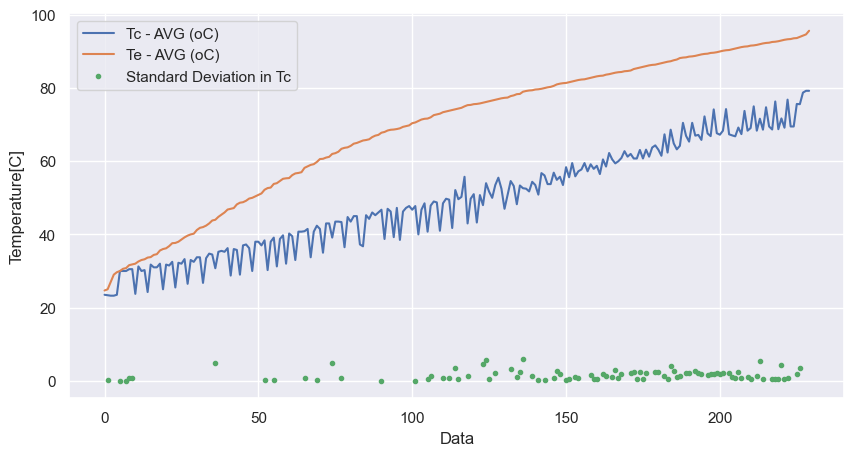

In [14]:
df_mean[['Tc - AVG (oC)', 'Te - AVG (oC)']].plot(style='-',
        figsize=(10,5))
df_std['Tc - AVG (oC)'].plot(style='.', xlabel='Data', ylabel='Temperature[C]', label='Standard Deviation in Tc')
plt.legend()

## Expanded Uncertainty [EU] calculation and plotting

PHP - Tc and Te temperature

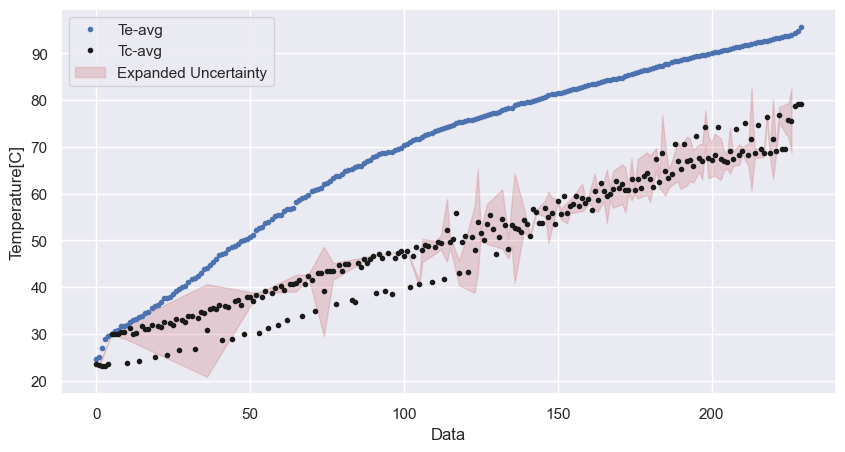

In [15]:
# plot of Tc and Te average tempratures with calculated expanded uncertainty with 95% confidence interval
plt.figure(figsize=(10,5));
plt.plot(df_mean['Te - AVG (oC)'].index, df_mean['Te - AVG (oC)'], '.b', label='Te-avg')
plt.plot(df_mean['Tc - AVG (oC)'].index, df_mean['Tc - AVG (oC)'], '.k', label='Tc-avg' )
idx = df_std.index
df_mean_idx = df_mean.loc[idx]
plt.fill_between(df_std['Tc - AVG (oC)'].index, df_mean_idx['Tc - AVG (oC)'] - 2* df_std['Tc - AVG (oC)'], df_mean_idx['Tc - AVG (oC)'] + 2* df_std['Tc - AVG (oC)'],color='r', alpha=0.2, label='Expanded Uncertainty')
plt.xlabel('Data')
plt.ylabel('Temperature[C]')
plt.legend()


PHP - Pressure

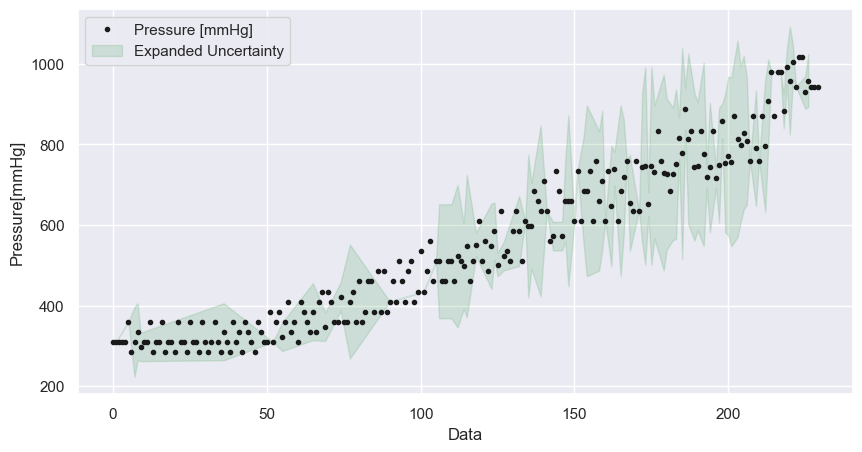

In [16]:
# pressure graph with EU
plt.figure(figsize=(10,5));
plt.plot(df_mean['Pressure (mm of Hg)'].index, df_mean['Pressure (mm of Hg)'], '.k', label='Pressure [mmHg]' )
idx = df_std.index
df_mean_idx = df_mean.loc[idx]
plt.fill_between(df_std['Pressure (mm of Hg)'].index, df_mean_idx['Pressure (mm of Hg)'] - 2* df_std['Pressure (mm of Hg)'], df_mean_idx['Pressure (mm of Hg)'] + 2* df_std['Pressure (mm of Hg)'],color='g', alpha=0.2, label='Expanded Uncertainty')
plt.xlabel('Data')
plt.ylabel('Pressure[mmHg]')
plt.legend()

PHP - Thermal Resistance

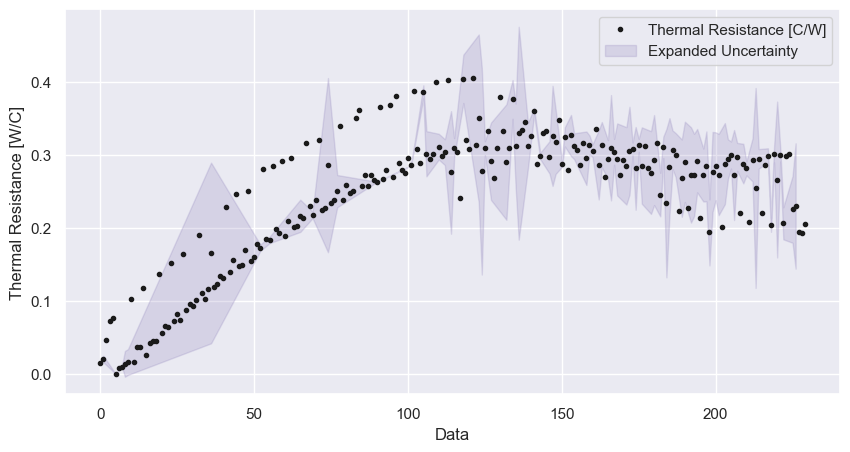

In [17]:
# thermal resistance graph with EU
plt.figure(figsize=(10,5));
plt.plot(df_mean['Resistance (oC/W)'].index, df_mean['Resistance (oC/W)'], '.k', label='Thermal Resistance [C/W]' )
idx = df_std.index
df_mean_idx = df_mean.loc[idx]
plt.fill_between(df_std['Resistance (oC/W)'].index, df_mean_idx['Resistance (oC/W)'] - 2* df_std['Resistance (oC/W)'], df_mean_idx['Resistance (oC/W)'] + 2* df_std['Resistance (oC/W)'],color='m', alpha=0.2, label='Expanded Uncertainty')
plt.xlabel('Data')
plt.ylabel('Thermal Resistance [W/C]')
plt.legend()

PHP - Temperature vs Pressure

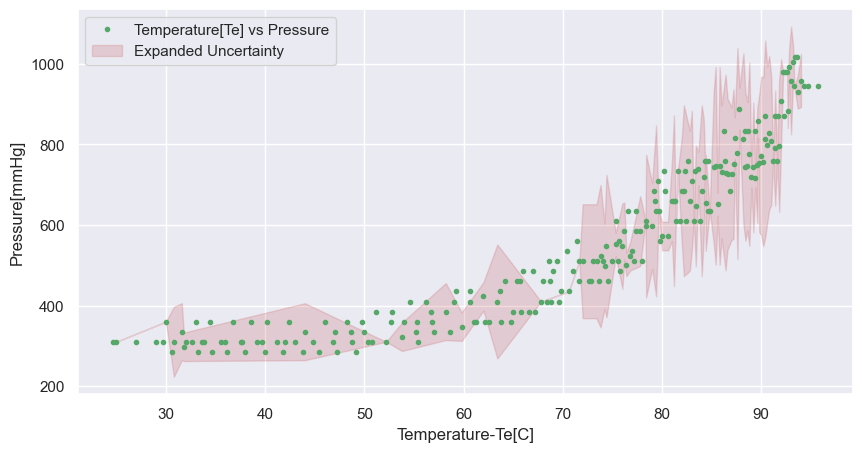

In [18]:
plt.figure(figsize=(10,5));
plt.plot(df_mean['Te - AVG (oC)'], df_mean['Pressure (mm of Hg)'],'.g', label='Temperature[Te] vs Pressure')
plt.fill_between(df_mean_idx['Te - AVG (oC)'],df_mean_idx['Pressure (mm of Hg)'] - 2* df_std['Pressure (mm of Hg)'], df_mean_idx['Pressure (mm of Hg)'] + 2* df_std['Pressure (mm of Hg)'], color='r', alpha=0.2, label='Expanded Uncertainty')
plt.xlabel('Temperature-Te[C]')
plt.ylabel('Pressure[mmHg]')
plt.legend()

PHP - Change in GFE

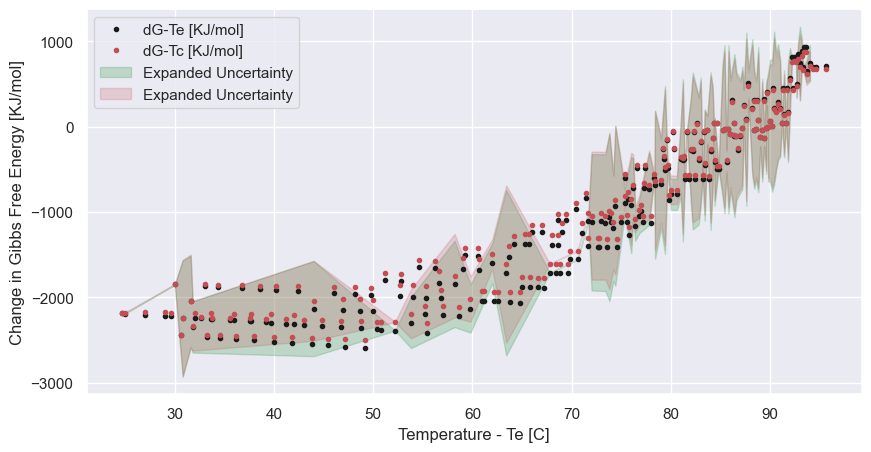

In [19]:
plt.figure(figsize=(10,5));
plt.plot(df_mean['Te - AVG (oC)'], df_mean['GFE [KJ/mol]'], '.k', label='dG-Te [KJ/mol]')
plt.plot(df_mean['Te - AVG (oC)'], df_mean['GFE_Tc [KJ/mol]'], '.r', label='dG-Tc [KJ/mol]')
plt.fill_between(df_mean_idx['Te - AVG (oC)'],df_mean_idx['GFE [KJ/mol]'] - 2* df_std['GFE [KJ/mol]'], df_mean_idx['GFE [KJ/mol]'] + 2* df_std['GFE [KJ/mol]'], color='g', alpha=0.3, label='Expanded Uncertainty')
plt.fill_between(df_mean_idx['Te - AVG (oC)'],df_mean_idx['GFE_Tc [KJ/mol]'] - 2* df_std['GFE_Tc [KJ/mol]'], df_mean_idx['GFE_Tc [KJ/mol]'] + 2* df_std['GFE_Tc [KJ/mol]'], color='r', alpha=0.2, label='Expanded Uncertainty')

plt.xlabel('Temperature - Te [C]')
plt.ylabel('Change in Gibbs Free Energy [KJ/mol]')
plt.legend()

PHP - dG

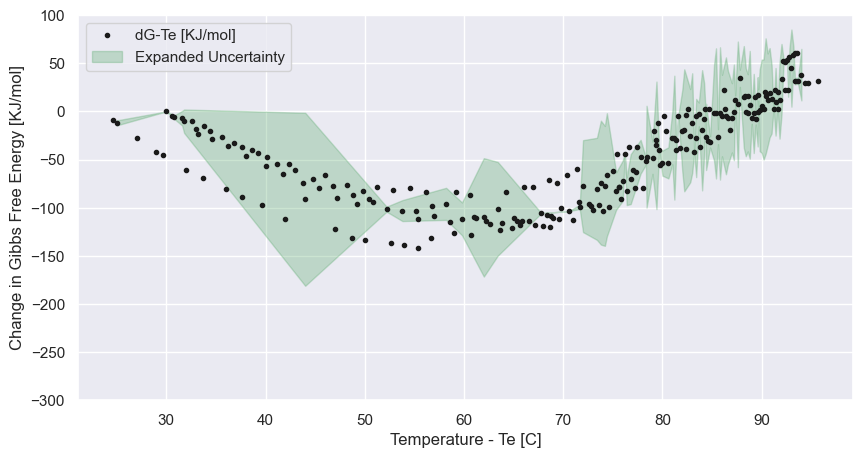

In [24]:
plt.figure(figsize=(10,5));
plt.plot(df_mean['Te - AVG (oC)'], df_mean['dG [KJ/mol]'], '.k', label='dG-Te [KJ/mol]')
plt.fill_between(df_mean_idx['Te - AVG (oC)'],df_mean_idx['dG [KJ/mol]'] - 2* df_std['dG [KJ/mol]'], df_mean_idx['dG [KJ/mol]'] + 2* df_std['dG [KJ/mol]'], color='g', alpha=0.3, label='Expanded Uncertainty')
plt.ylim(-300,100)
plt.xlabel('Temperature - Te [C]')
plt.ylabel('Change in Gibbs Free Energy [KJ/mol]')
plt.legend()

## Calculation of average EU of PHP measurement

Calculation of average uncertainty in the Tc-temperature measurement

In [20]:
# Tc - temperature average uncertainty in measurement
Tc_uncertainy = ((df_std['Tc - AVG (oC)'] / df_mean['Tc - AVG (oC)'])*100).dropna()
Tc_uncertainy_mean = Tc_uncertainy.mean()
print("Average Uncertainty for the Tc measurement {} [%]".format(round(Tc_uncertainy_mean,2)))

Average Uncertainty for the Tc measurement 2.78 [%]


Calculation of average uncertainty in the thermal resistance measurement

In [21]:
# Thermal resistance avg uncertainty calculation
TR_uncertainty = ((df_std['Resistance (oC/W)']/df_mean['Resistance (oC/W)'])*100).dropna()
TR_uncertainty_mean = TR_uncertainty.mean()
print("Average uncertainty for the Thermal Resistance measurement {} [%]".format(round(TR_uncertainty_mean,2)))

Average uncertainty for the Thermal Resistance measurement 8.6 [%]


## Calculation of average values of all properties

In [22]:
DataPropAvg(df_mean, df_std)

Tc  average:     49.5621 +- 1.5822 [C]
P   average:     552.0737 +- 50.8953 [mmHg]
dT  average:     19.4582 +- 1.5822 [C]
TR  average:     0.2432 +- 0.0198 [C/W]
GFE average:     -1020.7638 +- 222.2321 [KJ/mol]

